In [1]:
%matplotlib inline

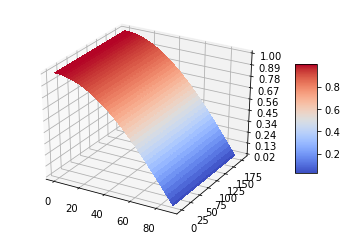

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 90, 1)
Y = np.arange(0, 180, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(np.deg2rad(X))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


How you change points:

Since it goes by ones its actually really easy. So if you look at the block below, you see I summoned the response for anything that is 45 degrees below the zenith, and tilted from 100 to 110 in phi. Using this manipulation, you can manually change stuff! Easy!


In [3]:
R = 0.76*np.ones(shape=np.shape(X))


In [4]:
(R[45:90,45:150])=0

In [ ]:
np.shape(R)

In [ ]:
mask1 = X == 3
mask2 = Y == 56

In [ ]:
Z[mask1 & mask2]

In [ ]:
np.shape(X)

In [ ]:
mask1 = np.ma.array(X, mask = [30,45])

In [ ]:
mask1 = X == 3
mask2 = Y == [145,45]

Z[mask1 & mask2]

In [ ]:
np.shape(X)

In [ ]:
mask1

In [ ]:
mask1

In [ ]:

np.round(87.7)

In [ ]:
def look_up_D(detnorm,source):
    """The look up table for detector D. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector D. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    
    ang = findAngles(detnorm,source)
    if type(ang) != np.float64:

        mask = ang > np.pi/2.

        ang[mask] = 0
        ang[~mask] = 0.76
    
        x = ang #rename bc it sounds better
    else: 
        if ang> np.pi/2:
            x = 0 
        else:
        #Or an elseif for other nuances, but simplest case this is it. 
            x = .76

    return x

In [ ]:
def response_lookup(source):
    
    sourcetheta,sourcephi = hp.vec2ang(source)
    sourcetheta = round(sourcetheta)
    sourcephi = round(sourcephi)
    #round to match the table, start interpolating later
    
    #now my cool table 
    
    X = np.arange(0, 90, 1)
    Y = np.arange(0, 360, 1)
    X, Y = np.meshgrid(X, Y)
    R = random.random()  #what gets hard coded in later. 
    Z = np.cos(np.deg2rad(X))
    mask1 = X == sourcetheta
    mask2 = Y == sourcephi

    R[mask1 & mask2] #this provides the response for the specific theta, phi of the sopurce. 
    

In [ ]:
import healpy as hp
import numpy as np
len(h)

In [ ]:
#Fuck around w this one. 

def look_up_A(detnorm,source,array=False):
    """The look up table for detector A. 
    Currently for all these functions the coordinates are relative to the top of the spacecraft,
    not indivudial detectors. To tranform just rotate by this specific detnorm. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector A. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    ang = findAngles(detnorm,source)   

    sourcetheta,sourcephi = hp.vec2ang(source)
    #convert to degrees for now, not a big dealio or anything yet. 
    sourcetheta = round(np.rad2deg(sourcetheta))   #This needs to be able to take in an array and produce corresponding R's. 
    sourcephi = round(np.rad2deg(sourcephi))
    X = np.arange(0, 180, 1)  #full sky now. 
    Y = np.arange(0, 360, 1)
    X, Y = np.meshgrid(X, Y)
    R = 0.76*np.ones(len(X))   #, normal one right now
    
    
    if not array:
        if ang> np.pi/2:
            x = 0 
        else:
            mask1 = X == sourcetheta
            mask2 = Y == sourcephi
    
            x = R[mask1 & mask2]
            

    else:

        
        
        x = []

        for spot in source:
            mask1 = spot[0]  #theta mask
            mask2 = spot[1]  #phi mask
        
            x.append(R[mask1 & mask2])
            
    return x





def look_up_B(detnorm,source,array=False):
    """The look up table for detector B. 
    Currently for all these functions the coordinates are relative to the top of the spacecraft,
    not indivudial detectors. To tranform just rotate by this specific detnorm. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector B. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    ang = findAngles(detnorm,source)   

    sourcetheta,sourcephi = hp.vec2ang(source)
    #convert to degrees for now, not a big dealio or anything yet. 
    sourcetheta = round(np.rad2deg(sourcetheta))   #This needs to be able to take in an array and produce corresponding R's. 
    sourcephi = round(np.rad2deg(sourcephi))
    X = np.arange(0, 180, 1)  #full sky now. 
    Y = np.arange(0, 360, 1)
    X, Y = np.meshgrid(X, Y)
    R = 0.76*np.ones(len(X))   #, normal one right now
    
    
    if not array:
        if ang> np.pi/2:
            x = 0 
        else:
            mask1 = X == sourcetheta
            mask2 = Y == sourcephi
    
            x = R[mask1 & mask2]
            

    else:

        
        
        x = []

        for spot in source:
            mask1 = spot[0]  #theta mask
            mask2 = spot[1]  #phi mask
        
            x.append(R[mask1 & mask2])
            
    return x










def look_up_C(detnorm,source,array=False):
    """The look up table for detector C. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector C. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    ang = findAngles(detnorm,source)   

    sourcetheta,sourcephi = hp.vec2ang(source)
    #convert to degrees for now, not a big dealio or anything yet. 
    sourcetheta = round(np.rad2deg(sourcetheta))   #This needs to be able to take in an array and produce corresponding R's. 
    sourcephi = round(np.rad2deg(sourcephi))
    X = np.arange(0, 180, 1)  #full sky now. 
    Y = np.arange(0, 360, 1)
    X, Y = np.meshgrid(X, Y)
    R = 0.54*np.ones(len(X))   #, normal one right now
    
    
    if not array:
        if ang> np.pi/2:
            x = 0 
        else:
            mask1 = X == sourcetheta
            mask2 = Y == sourcephi
    
            x = R[mask1 & mask2]
            

    else:

        
        
        x = []

        for spot in source:
            mask1 = spot[0]  #theta mask
            mask2 = spot[1]  #phi mask
        
            x.append(R[mask1 & mask2])
            
    return x

def look_up_D(detnorm,source,array=False):
    """The look up table for detector D. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector D. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    ang = findAngles(detnorm,source)   

    sourcetheta,sourcephi = hp.vec2ang(source)
    #convert to degrees for now, not a big dealio or anything yet. 
    sourcetheta = round(np.rad2deg(sourcetheta))   #This needs to be able to take in an array and produce corresponding R's. 
    sourcephi = round(np.rad2deg(sourcephi))
    X = np.arange(0, 180, 1)  #full sky now. 
    Y = np.arange(0, 360, 1)
    X, Y = np.meshgrid(X, Y)
    R = 0.76*np.ones(len(X))   #, normal one right now
    
    
    if not array:
        if ang> np.pi/2:
            x = 0 
        else:
            mask1 = X == sourcetheta
            mask2 = Y == sourcephi
    
            x = R[mask1 & mask2]
            

    else:

        
        
        x = []

        for spot in source:
            mask1 = spot[0]  #theta mask
            mask2 = spot[1]  #phi mask
        
            x.append(R[mask1 & mask2])
            
    return x





In [ ]:
def look_up_C(detnorm,source):
    """The look up table for detector C. 
    
    Parameters
    ----------   
    detnorm : array
        The vector normal to detector C. 
    source : array
        The vector pointing to where in the sky the GRB came from. 
    
    
    Returns
    -------
    
    x : float
        The exponent of dependence for the detector's response.
    """
    
    ang = findAngles(detnorm,source)   
    if type(ang) != np.float64:

    #for this one calling it just mask1 since I'm sure more features will be added. 
        mask1 = ang > np.pi/3.

        ang[mask1] = 0
        ang[~mask1] = 0.5
    
        x = ang #rename bc it sounds better
    else: 
        if ang> np.pi/3:
            x = 0 
        else:
        #Or an elseif for other nuances, but simplest case this is it. 
            x = .5
    return x

